In [1]:
import plotly.express as px #visualization
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import re
import nltk
import string
from snowballstemmer import TurkishStemmer
pd.set_option('display.max_colwidth', -1)

C:\Users\baris\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.


In [2]:
neg=pd.read_csv('negative_words_tr.txt')# pozitif kelimeler
pos=pd.read_csv('positive_words_tr.txt') #negatif kelimeler

In [3]:
import pandas as pd
dataset = pd.read_csv('TEB_sikayetvar-2020-08-18.csv')

In [4]:
sikayetler = dataset['Sikayetler'].str.lower()

In [5]:
PUNCT_TO_REMOVE = string.punctuation
stoplist=stopwords.words('turkish')
def remove_punctuation(text):# noktalama işaretlerini kaldırmak için
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

sikayetler = sikayetler.apply(lambda text: remove_punctuation(text))
def remove_stopwords(text): #stopwords kaldırmak için
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stoplist])

dataset['text_stop'] = sikayetler.apply(lambda text: remove_stopwords(text))

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\baris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
def stemming_tokenizer(text): 
    stemmer = TurkishStemmer()
    return [stemmer.stemWord(w) for w in word_tokenize(text)]
dataset['text_token'] = dataset['text_stop'].apply(lambda text: stemming_tokenizer(text))

In [8]:
dataset['text_token']

0       [teb, kredi, kart, 120, tl, yıllıkkart, ücret, yansıtıl, t, c, yasa, gör, yapıla, ücretlendirme, 13, hukuk, daire, verile, 201147, esas, 2011115, sayıl, son, karar, gör, söz, konus, yıllık, kart, ücret, aidat, bk, 125, madde, hgk, 201019388, sayıl, karar, uyar, geri, dönük, kesile, kart, aidat, iade, olacak, dair, ke, hükmü, bulunmak, aksi, takdir, kredi, kart, iptal, talep, bulunacak]                                                                                                                                                                                                                                                                                                                                                
1       [yaklaşık, 2, haf, ö, ceptetep, başvurus, yap, 1, haf, ö, gelip, ba, kağıt, vs, imzalatıp, kar, verip, git, akşa, şifre, gelir, dedi, 3, gün, sonra, mesaj, gel, sözleşme, olmamış, tekrar, gelecek, dedi, hal, ses, seda, yok, kimse, gelip, gitmedi, kadar, vasat

In [9]:
def word_finder1(x):
    df_words = set(" ".join(x).split(" "))
    extract_words =  set(neg.eski.to_list()).intersection(df_words)
    return ', '.join(extract_words)
def word_finder2(x):
    df_words = set(" ".join(x).split(" "))
    extract_words =  set(pos.olan.to_list()).intersection(df_words)
    return ', '.join(extract_words)
dataset['neg'] = dataset.text_token.apply(word_finder1)
dataset['pos'] = dataset.text_token.apply(word_finder2)

In [10]:
dataset["Aidat"] = dataset["text_token"].map(lambda x: "1" if "aidat" in x else "0")
dataset["Bonus"] = dataset["text_token"].map(lambda x: "1" if "bonus" in x else "0")
dataset["Kredi"] = dataset["text_token"].map(lambda x: "1" if "kredi" in x else "0")
dataset["Musteri"] = dataset["text_token"].map(lambda x: "1" if "müşteri" in x else "0")
dataset["Hizmet"] = dataset["text_token"].map(lambda x: "1" if "hizmet" in x else "0")
dataset["Sube"] = dataset["text_token"].map(lambda x: "1" if "şube" in x else "0")
dataset["Cep"] = dataset["text_token"].map(lambda x: "1" if "cep" in x else "0")
dataset["Hak"] = dataset["text_token"].map(lambda x: "1" if "hak" in x else "0")
dataset["Hesap"] = dataset["text_token"].map(lambda x: "1" if "hesap" in x else "0")
dataset["Talep"] = dataset["text_token"].map(lambda x: "1" if "talep" in x else "0")
dataset["Ucret"] = dataset["text_token"].map(lambda x: "1" if "ücret" in x else "0")

In [11]:
dataset

,Unnamed: 0,Basliklar,Linkler,Sikayetler,text_stop,text_token,neg,pos,Aidat,Bonus,Kredi,Musteri,Hizmet,Sube,Cep,Hak,Hesap,Talep,Ucret
0,0,TEB Kredi Kart Aidatı,/teb/teb-kredi-kart-aidati-44,TEB Kredi Kartıma 120 TL yıllıkkart ücreti yansıtılmıştır. T. C. Yasalarına göre yapılan bu ücretlendirme 13. Hukuk dairesince verilen 2011/47 ** esas 2011/115** sayılı son karara göre söz konusu yıllık kart ücreti aidatının bk. 125. Madde ve HGK 2010/1-93-88 sayılı karar uyarınca geriye dönük kesilen kart aidatlarının da iadesinin de olacağına dair de kesin hükmü bulunmaktadır. Aksi takdirde kredi kartınızı iptal talebinde bulunacağım.,teb kredi kartıma 120 tl yıllıkkart ücreti yansıtılmıştır t c yasalarına göre yapılan ücretlendirme 13 hukuk dairesince verilen 201147 esas 2011115 sayılı son karara göre söz konusu yıllık kart ücreti aidatının bk 125 madde hgk 201019388 sayılı karar uyarınca geriye dönük kesilen kart aidatlarının iadesinin olacağına dair kesin hükmü bulunmaktadır aksi takdirde kredi kartınızı iptal talebinde bulunacağım,"[teb, kredi, kart, 120, tl, yıllıkkart, ücret, yansıtıl, t, c, yasa, gör, yapıla, ücretlendirme, 13, hukuk, daire, verile, 201147, esas, 2011115, sayıl, son, karar, gör, söz, konus, yıllık, kart, ücret, aidat, bk, 125, madde, hgk, 201019388, sayıl, karar, uyar, geri, dönük, kesile, kart, aidat, iade, olacak, dair, ke, hükmü, bulunmak, aksi, takdir, kredi, kart, iptal, talep, bulunacak]",geri,"söz, iade, takdir",1,0,1,0,0,0,0,0,0,1,1
1,1,TEB Hesap İşleminin Gerçekleşmemesi,/teb/teb-hesap-isleminin-gerceklesmemesi,"Yaklaşık 2 hafta önce CepteTeb başvurusu yaptım, 1 hafta önce biri gelip bana kağıt vs imzalatıp kartı verip gitti. Akşam şifre gelir dedi ama 3 gün sonra mesaj geldi, sözleşmeler olmamış tekrar geleceğiz dediler hala ses seda yok, kimsede gelip gitmedi. Bu kadar vasat bir banka görmedim. Başka bankadan kart istediğimde 2 gün sonra mobil şubesine giriş yapmıştım. Ama TEB de 2 haftadır şifrem olmadığı için hesaba giriş yapamıyorum. 3 gün içerisinde hesabım aktif olmaz ise BBDK ya şikayette bulunacağım.",yaklaşık 2 hafta önce cepteteb başvurusu yaptım 1 hafta önce gelip bana kağıt vs imzalatıp kartı verip gitti akşam şifre gelir dedi 3 gün sonra mesaj geldi sözleşmeler olmamış tekrar geleceğiz dediler hala ses seda yok kimsede gelip gitmedi kadar vasat bir banka görmedim başka bankadan kart istediğimde 2 gün sonra mobil şubesine giriş yapmıştım teb 2 haftadır şifrem olmadığı hesaba giriş yapamıyorum 3 gün içerisinde hesabım aktif olmaz bbdk şikayette bulunacağım,"[yaklaşık, 2, haf, ö, ceptetep, başvurus, yap, 1, haf, ö, gelip, ba, kağıt, vs, imzalatıp, kar, verip, git, akşa, şifre, gelir, dedi, 3, gün, sonra, mesaj, gel, sözleşme, olmamış, tekrar, gelecek, dedi, hal, ses, seda, yok, kimse, gelip, gitmedi, kadar, vasat, bir, banka, görmedi, başka, banka, kart, istedik, 2, gün, sonra, mobil, şube, giriş, yapmış, teb, 2, haf, şifre, olmadık, hesap, giriş, yapamıyor, 3, gün, içeri, hesap, aktif, olmaz, bbdk, şikayet, bulunacak]","vasat, yok, şikayet",sözleşme,0,0,0,0,0,1,0,0,1,0,0
2,2,TEB Cep Mobil Şifre,/teb/teb-cep-mobil-sifre,0850*******66 bu telden şifremi unuttum dedim aldım bugün bana ya kart numarası ya da bankaya gitmem gerektiğini söylüyor. Bu bankanın salgından haberi yok herhalde yani bankaya gitmeden halletmek yok bir de söyle banka böyle banla diye reklam veriyorlar,085066 telden şifremi unuttum dedim aldım bugün bana kart numarası bankaya gitmem gerektiğini söylüyor bankanın salgından haberi yok herhalde bankaya gitmeden halletmek yok bir söyle banka böyle banla reklam veriyorlar,"[085066, tel, şifre, unut, dedi, al, bugu, ba, kart, numaras, banka, gitme, gerektik, söylüyor, banka, salgı, haber, yok, herhal, banka, gitme, halletmek, yok, bir, sö, banka, bö, ba, rekla, veriyor]",yok,,0,0,0,0,0,0,0,0,0,0,0
3,3,Teb Atm Paramı Yuttu,/teb/teb-atm-parami-yuttu-178,"15 Ağustos 2020 Cumartesi günü 18:11 civarı, Oasis Bodrum AVM'de TEB02358 termıdli bankamatikte para yatırma işlemi sırasında parayı 

In [12]:
dataset = dataset.replace(r'^\s*$', np.nan, regex=True).fillna(0)

In [13]:
dataset[dataset['pos'] != 0] = 1

In [14]:
dataset['score']=dataset['pos']

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn

In [16]:
target_count = dataset.score.value_counts()
target_count

1    2470
0    584 
Name: score, dtype: int64

Class 0: 584
Class 1: 2470
Proportion: 0.24 : 1


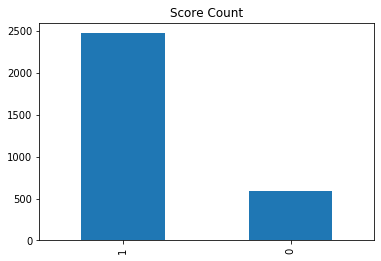

In [17]:
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Score Count');

#imbalanced bir dataset olduğu için undersampling metodunu uygulayacağız. 

In [18]:
dataset.columns

Index(['Unnamed: 0', 'Basliklar', 'Linkler', 'Sikayetler', 'text_stop',
       'text_token', 'neg', 'pos', 'Aidat', 'Bonus', 'Kredi', 'Musteri',
       'Hizmet', 'Sube', 'Cep', 'Hak', 'Hesap', 'Talep', 'Ucret', 'score'],
      dtype='object')

In [19]:
dataset2 = dataset[['Aidat', 'Bonus', 'Kredi',
       'Musteri', 'Hizmet', 'Sube', 'Cep',
       'Hak', 'Hesap', 'Talep', 'Ucret']]
response = dataset['score']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset2,response,test_size = 0.2,random_state = 0)


In [21]:
import random 
# Balancing the Training Set
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)


ValueError: Unknown label type: 'unknown'

In [ ]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))